In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import bamboolib as bam

In [2]:
# Import model

expected_model_version = '1.0'
model_path = r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Five - Modeling\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [3]:
# Import data
ski_data = pd.read_csv(r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Four - Preprocessing and Training\data\ski_data_step4_features.csv')

In [4]:
# Define subset for plot data
dfPlot = ski_data.copy()

In [5]:
# Subset rows for plot data
dfPlot.dropna(subset=['AdultWeekend'], inplace=True)

In [6]:
# Subset cols for model prediction
x_features = dfPlot.set_index(['Name','Region','state']).copy()
x_bmr = x_features.loc['Big Mountain Resort',model.X_columns].copy()

In [7]:
# Define model plot parameters
modelPlotCount = 50
maxVals = x_features.max()
minVals = x_features.min()
plotInterval = (maxVals - minVals) / modelPlotCount
xColsCount = len(model.X_columns)

In [8]:
# Define empty DataFrames for iterating through model prediction scenarios
df = pd.DataFrame(index=[i for i in range(0,modelPlotCount)], columns = model.X_columns, dtype=float).copy()
x_modelVars = df.copy()
y_modelOutput = df.copy()

In [9]:
# Populate x_modelVars with features variables at each interval
x_modelVars.iloc[0,:] = minVals
for i in range(1,modelPlotCount):
    x_modelVars.iloc[i,:] = x_modelVars.iloc[i-1,:] + plotInterval

In [10]:
# Populate y_modelOutput with adjusted predictions for each value in x_modelVars
for col in range(0,xColsCount):
    for row in range(0,modelPlotCount):
        x_bmrMod = x_bmr.copy()
        x_bmrMod.iloc[0,col] = x_modelVars.iloc[row,col]
        y_modelOutput.iloc[row,col] = model.predict(x_bmrMod).item()
        #print('r' + str(row))
    print('c' + str(col))

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19
c20
c21
c22
c23
c24
c25
c26
c27
c28
c29
c30
c31


In [24]:
y_modelOutput.T

0         1         2         3   \
summit_elev                         91.21839  91.21839  91.21839  91.24139   
vertical_drop                       90.13140  90.13140  90.13140  90.13140   
base_elev                           91.91099  91.91099  91.91099  91.89500   
trams                               91.78420  91.78420  91.78420  91.78420   
fastSixes                           91.78420  91.78420  91.78420  91.78420   
fastQuads                           83.93881  83.93881  91.69940  91.69940   
quad                                90.76300  90.76300  90.76300  90.76300   
triple                              91.09619  91.09619  91.09619  91.09619   
double                              91.78420  91.78420  91.60519  91.60519   
surface                             91.48120  91.48120  91.48120  91.24920   
total_chairs                        90.86060  90.86060  90.95060  90.95060   
Runs                                77.76991  77.79991  79.02991  79.48993   
TerrainParks                        88.34099  88.34099  88.34099  88.38199   
LongestRun_mi                       90.94721  90.94721  90.94721  90.94721   
SkiableTerrain_ac                   89.07016  90.15523  91.01620  90.99220   
Snow Making_ac                      81.21899  81.23599  81.14599  81.24599   
daysOpenLastYear                    88.92458  88.92458  88.92458  88.92458   
yearsOpen                           92.17320  92.17320  92.17320  92.17320   
averageSnowfall                     90.78500  90.78500  90.78500  90.78500   
projectedDaysOpen                   87.42558  87.42558  87.42558  87.42558   
NightSkiing_ac                      91.66220  91.66220  91.66220  91.67720   
resorts_per_state                   92.18320  92.18320  92.18320  92.18320   
state_total_skiable_area_ac         92.93319  92.94719  93.00719  92.99719   
state_total_days_open               91.75220  91.75220  91.75220  91.75220   
state_total_terrain_parks           92.13920  92.13920  92.13920  92.14320   
state_total_nightskiing_ac          97.95299  93.09999  93.12699  93.11699   
resorts_per_100kcapita              92.71920  92.71420  92.74620  92.49320   
resorts_per_100ksq_mile             91.95920  91.99920  91.81520  91.99220   
resort_skiable_area_ac_state_ratio  90.89920  90.88220  91.35920  91.35820   
resort_days_open_state_ratio        92.82820  92.82820  92.87020  92.69420   
resort_terrain_park_state_ratio     91.94560  91.93960  91.81460  91.72320   
resort_night_skiing_state_ratio     91.61540  91.61540  91.60940  91.61540   

                                          4         5         6         7   \
summit_elev                         91.51039  91.55339  91.58739  91.76219   
vertical_drop                       90.24640  90.31740  90.90440  91.06040   
base_elev                           91.87220  91.90320  91.89020  91.89220   
trams                               91.78420  91.78420  91.78420  91.78420   
fastSixes                           91.78420  91.78420  91.78420  91.78420   
fastQuads                           91.70120  91.70120  91.75620  91.74720   
quad                                91.23620  91.23620  91.23620  91.20120   
triple                              91.33819  91.33819  91.33819  91.43019   
double                              91.65319  91.65319  91.70819  91.70819   
surface                             91.24920  91.24920  91.24820  91.24820   
total_chairs                        90.95060  90.93560  91.06960  91.21360   
Runs                                80.23292  80.61292  82.20789  84.54587   
TerrainParks                        88.38199  88.38199  88.37999  88.37999   
LongestRun_mi                       90.99421  91.02221  91.44321  91.44921   
SkiableTerrain_ac                   90.95320  90.93620  90.91520  90.96520   
Snow Making_ac                      81.22299  81.31219  81.24519  81.32419   
daysOpenLastYear                    88.92458  88.92458  88.92458  88.92458   
yearsOpen                           92.17320  92.17320  92.1732

In [26]:
# Define plot data view
sPlotData = dfPlot.copy()
sPlotData = sPlotData.set_index('Name')

In [27]:
# Define hue conditions
def setHue(state):
    if state == 'Montana': return 'Montana'
    elif state in ['Idaho','Wyoming','North Dakota','South Dakota']: return 'Adjacent State'
    else: return 'Other'

In [28]:
# Define hue via state conditions
sPlotData['hue'] = sPlotData['state'].apply(setHue)
sPlotData.loc['Big Mountain Resort','hue'] = 'Big Mountain Resort'

In [29]:
# Define point size, prominent for Big Mountain Resort
sPlotData['PointSize'] = 0
sPlotData.loc['Big Mountain Resort','PointSize'] = 5

In [38]:
# Define plot function, price vs feature
def plotPrice(feature):

    sb.set_context("talk", font_scale=1.1)
    plt.figure(figsize=(20,10))

    modelLine = pd.DataFrame(index = x_modelVars.index,dtype=float)
    modelLine['y'] = y_modelOutput[feature]
    modelLine['x'] = x_modelVars[feature]

    sb.lineplot(x='x', y='y', data=modelLine, color='r')
    sb.scatterplot(x=feature, y='AdultWeekend', hue='hue', data=sPlotData, size='PointSize')

    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.tight_layout()
    plt.savefig("default_legend_position_Seaborn_scatterplot.png", format='png',dpi=150)

In [37]:
# Define plot function, price vs feature
def plotPrice2():

    plotFeatures = 'vertical_drop'
    
    sb.set_context("talk", font_scale=1.1)
    plt.figure(figsize=(20,10))

    modelLine = pd.DataFrame(index = x_modelVars.index,dtype=float)
    modelLine['y'] = y_modelOutput[plotFeatures]
    modelLine['x'] = x_modelVars[plotFeatures]

    sb.lineplot(x='x', y='y', data=modelLine, color='r')
    sb.scatterplot(x=plotFeatures, y='AdultWeekend', hue='hue', data=sPlotData, size='PointSize')

    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.tight_layout()
    plt.savefig("default_legend_position_Seaborn_scatterplot.png", format='png',dpi=150)

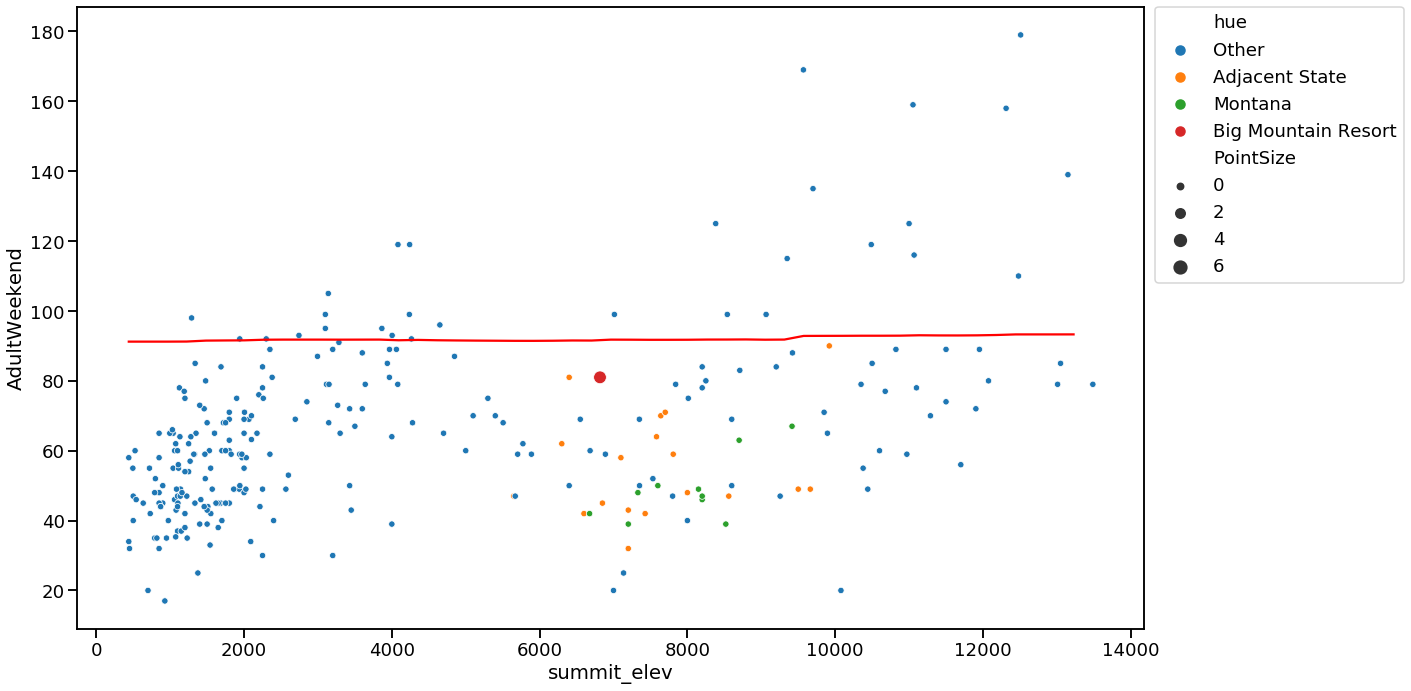

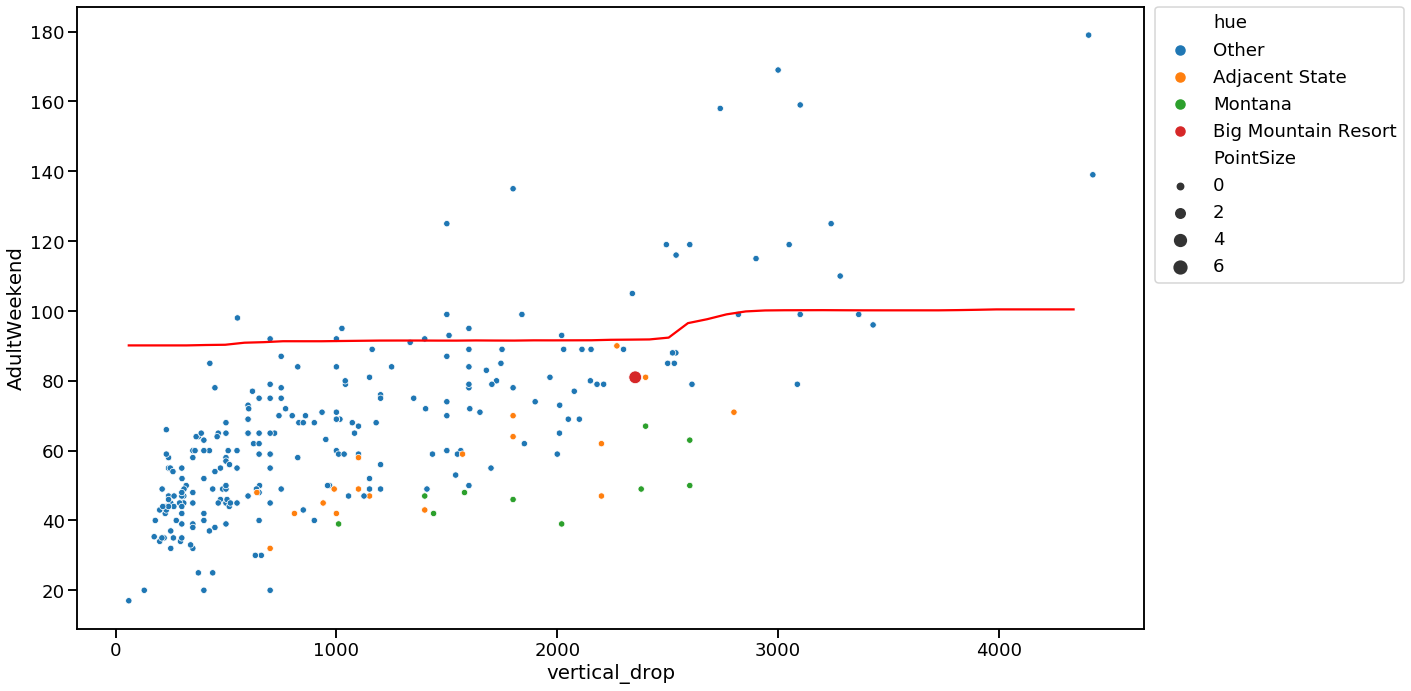

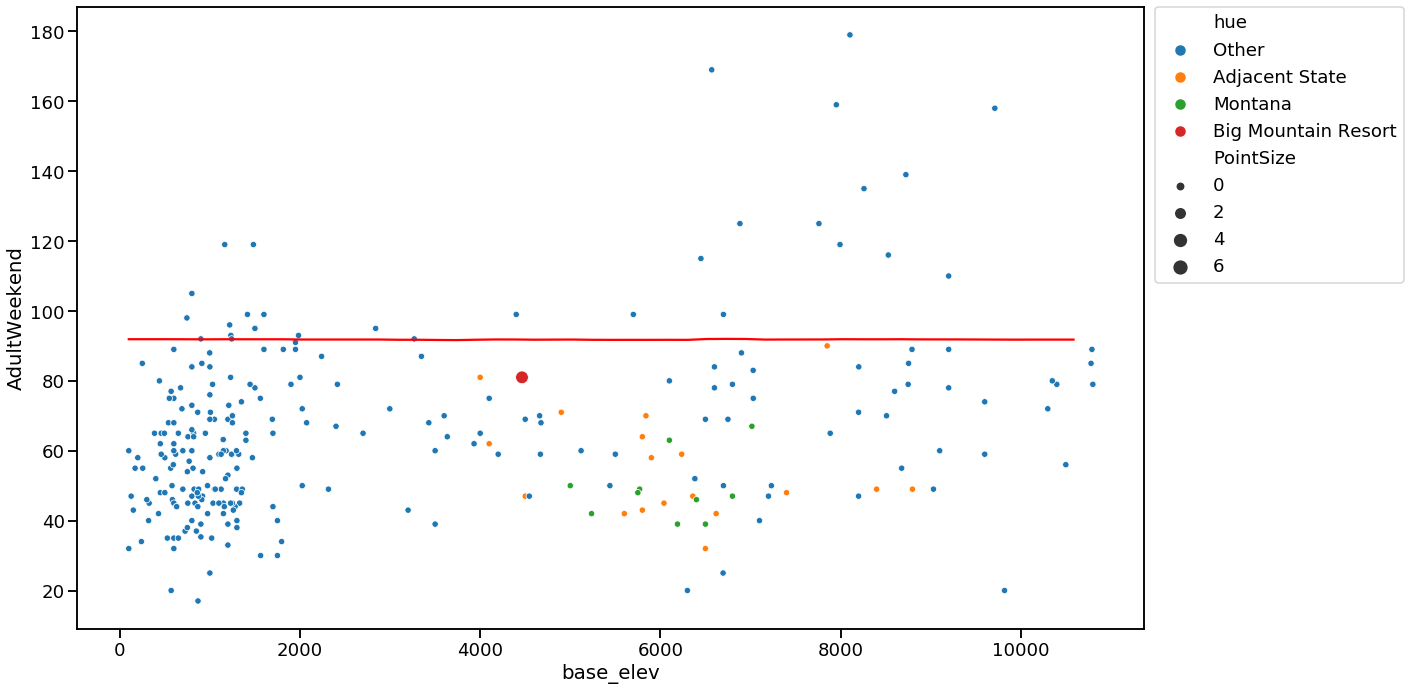

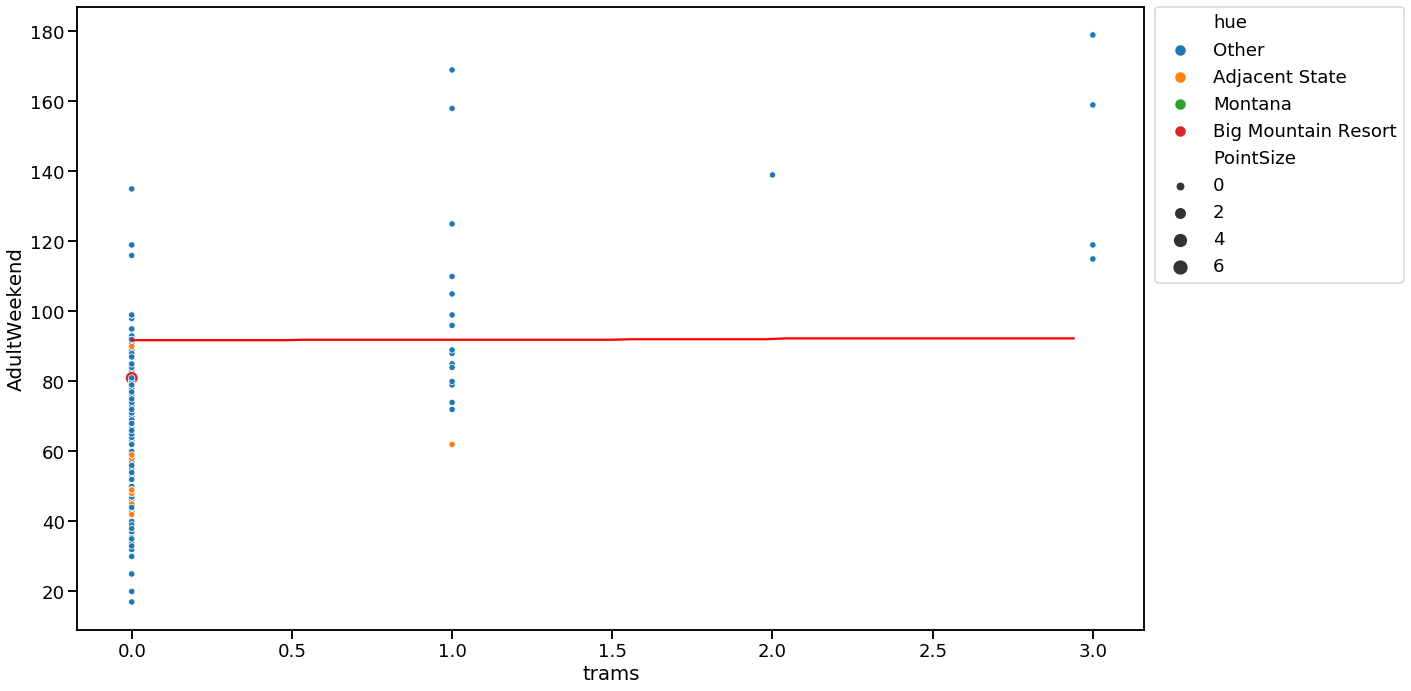

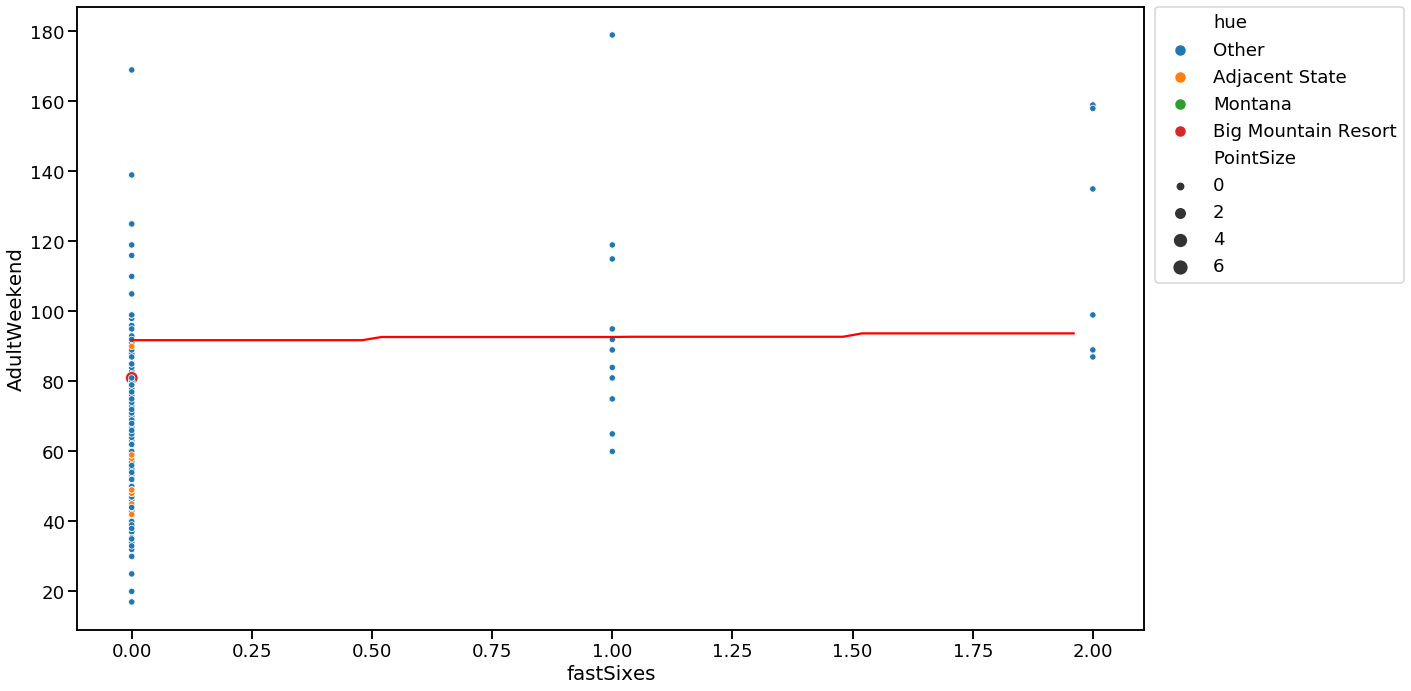

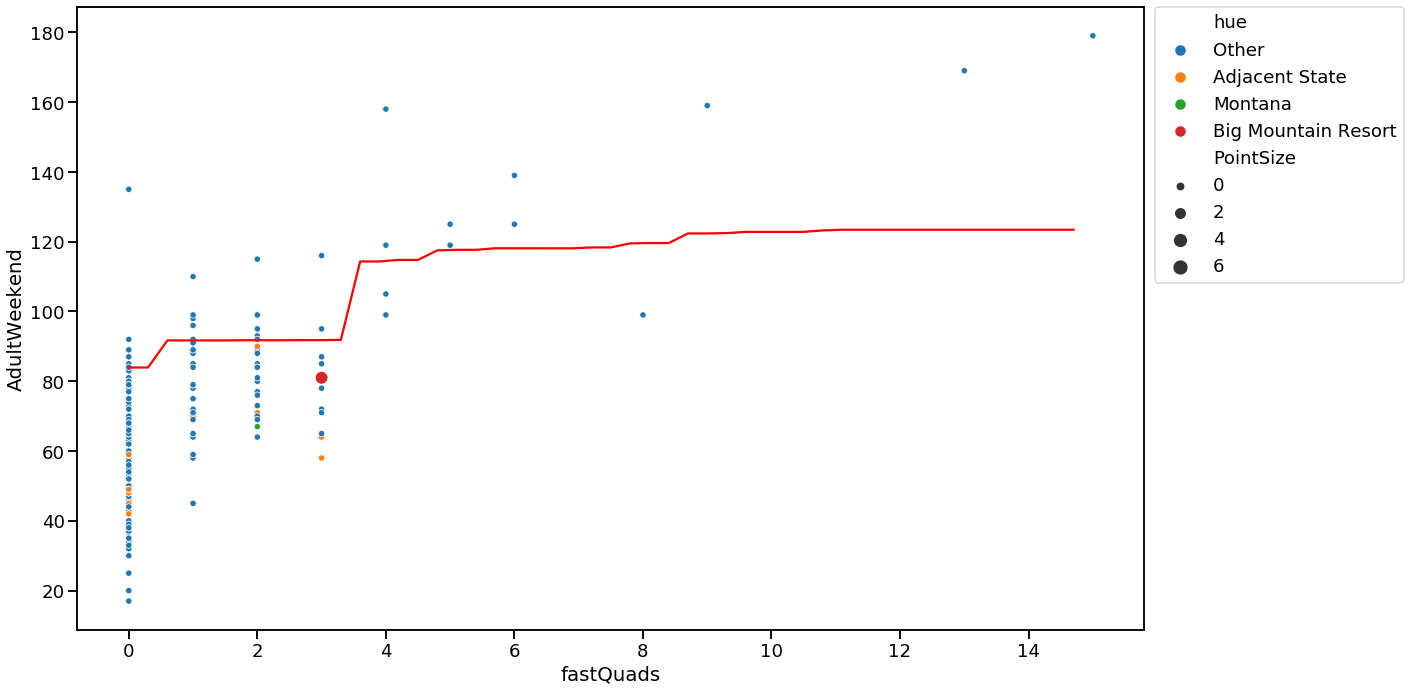

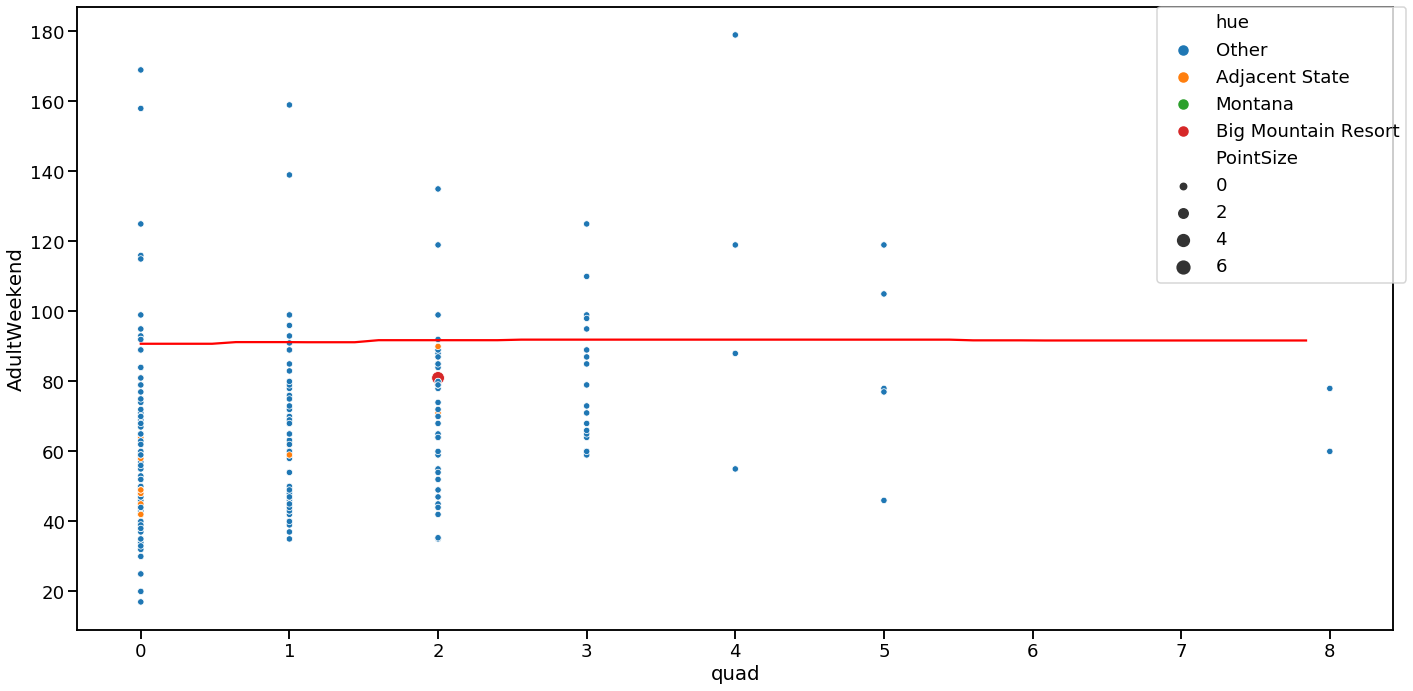

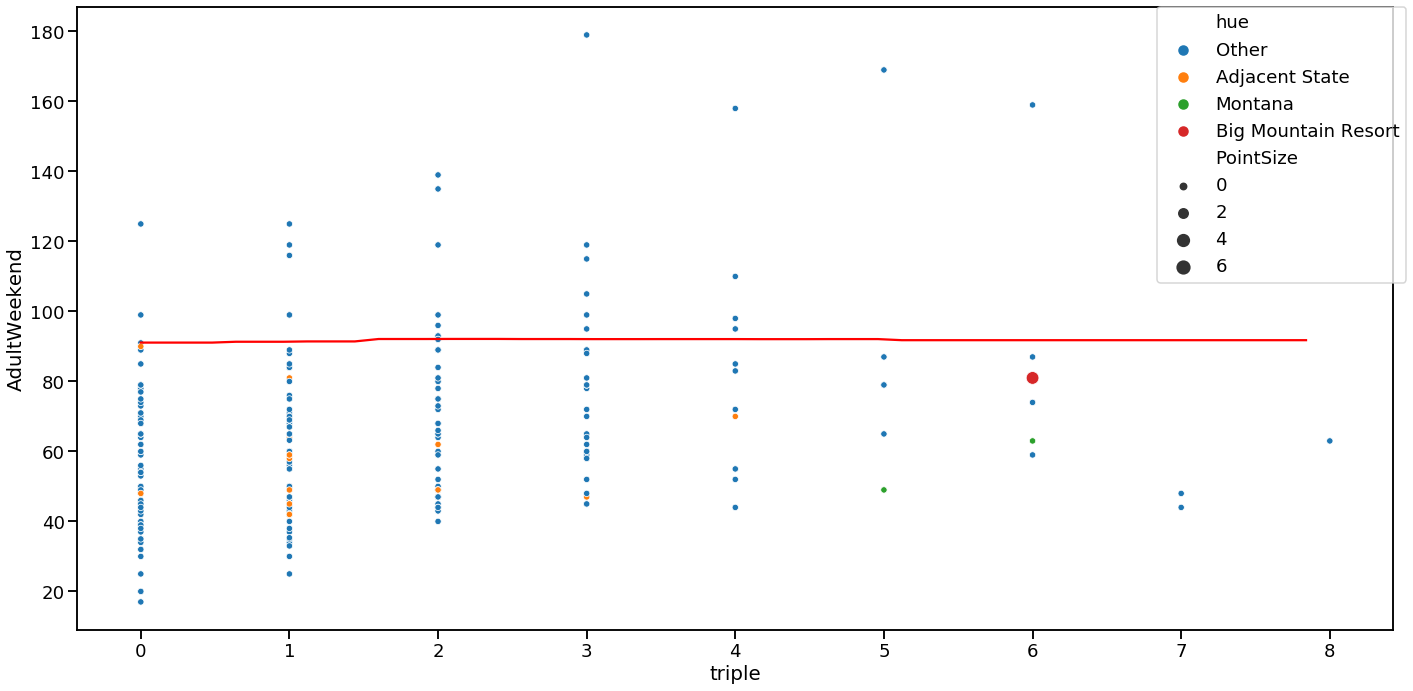

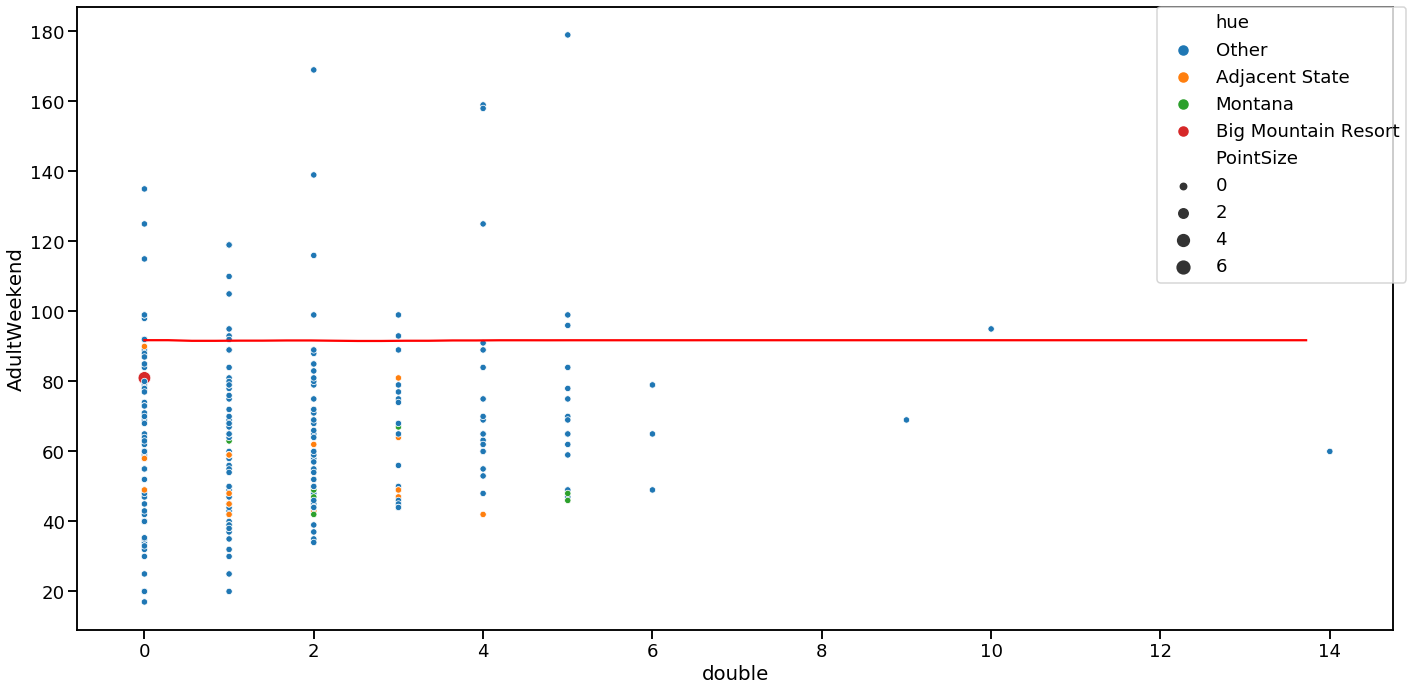

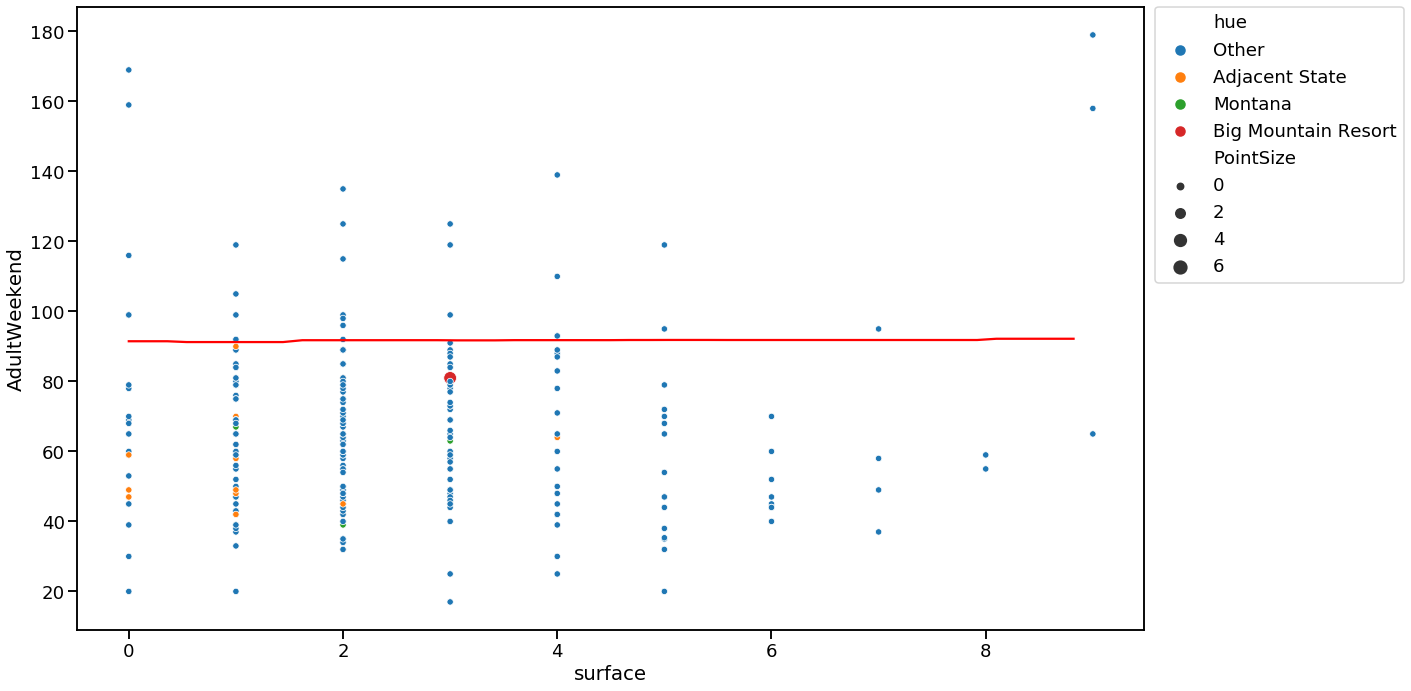

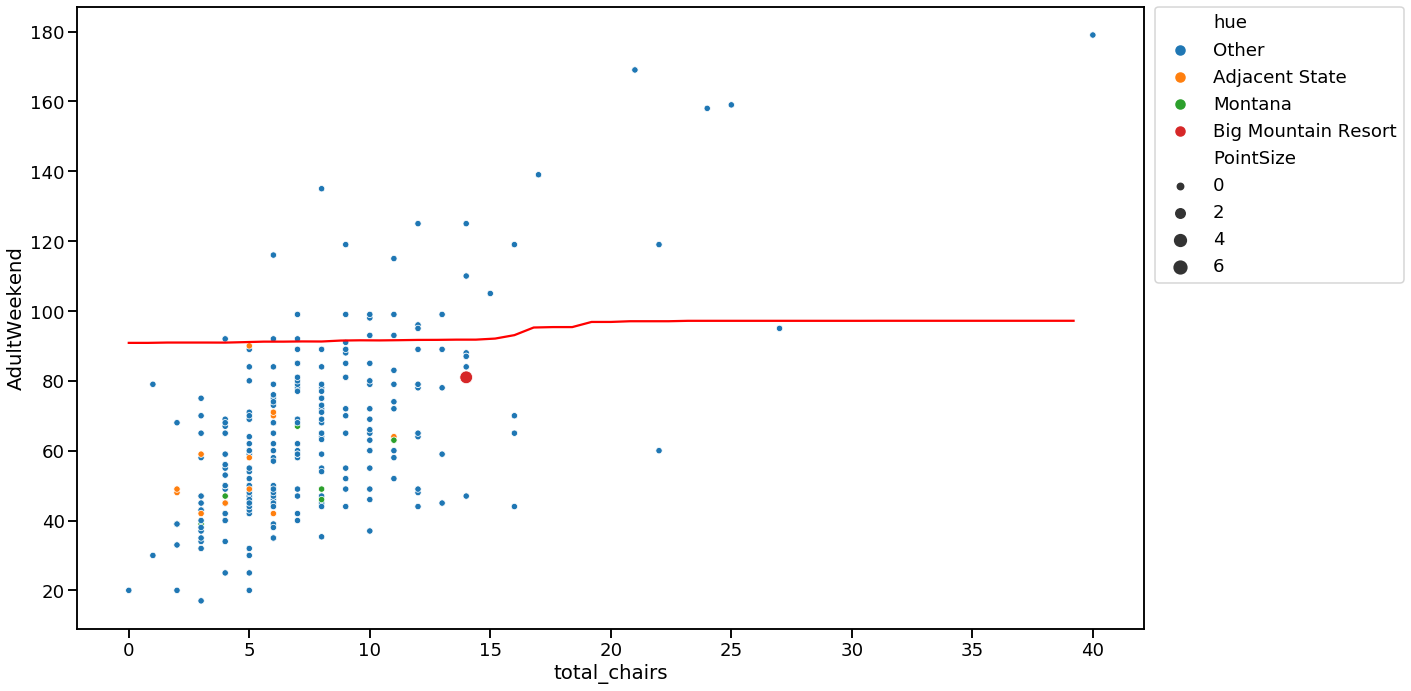

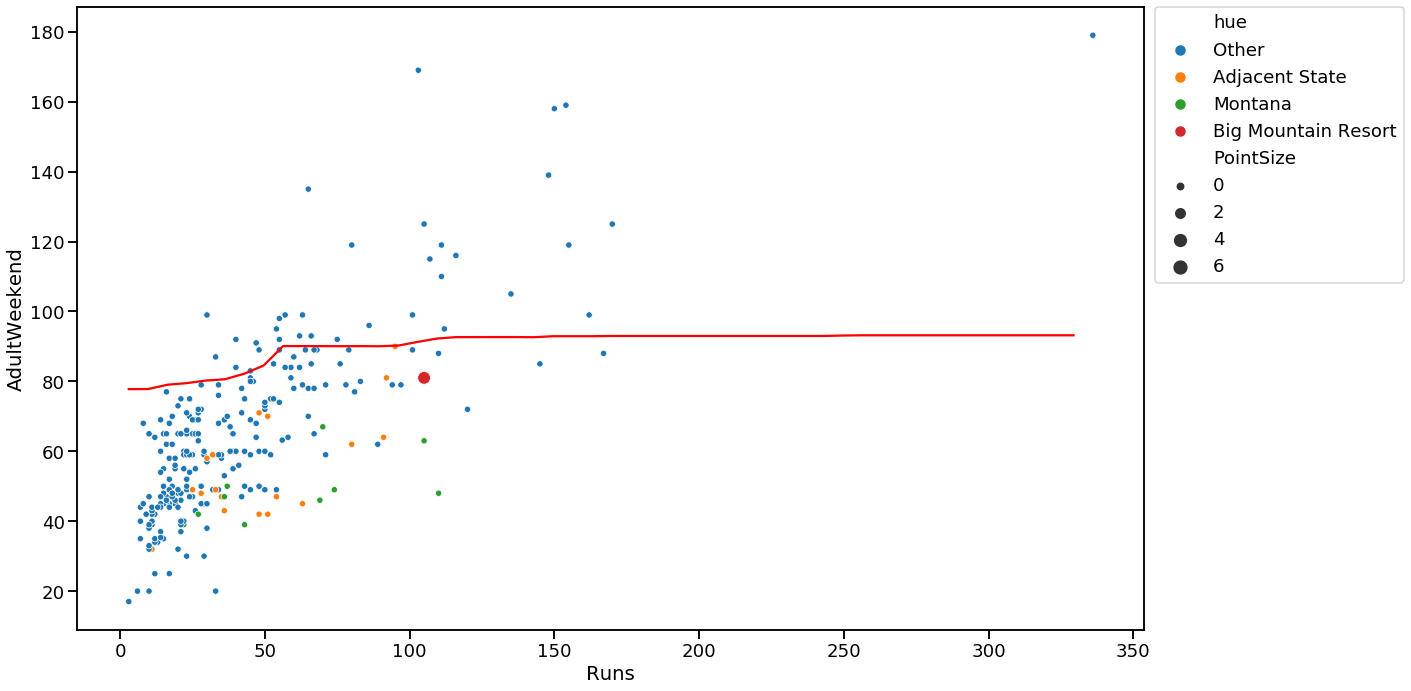

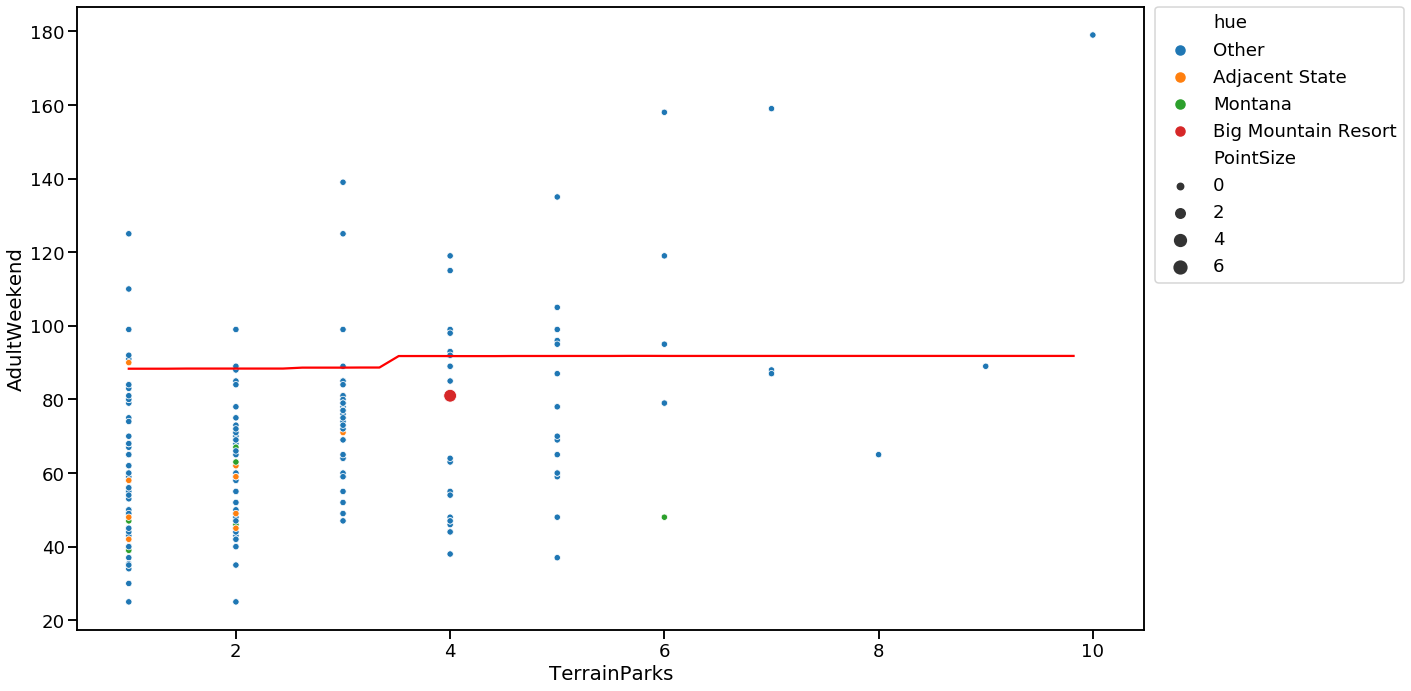

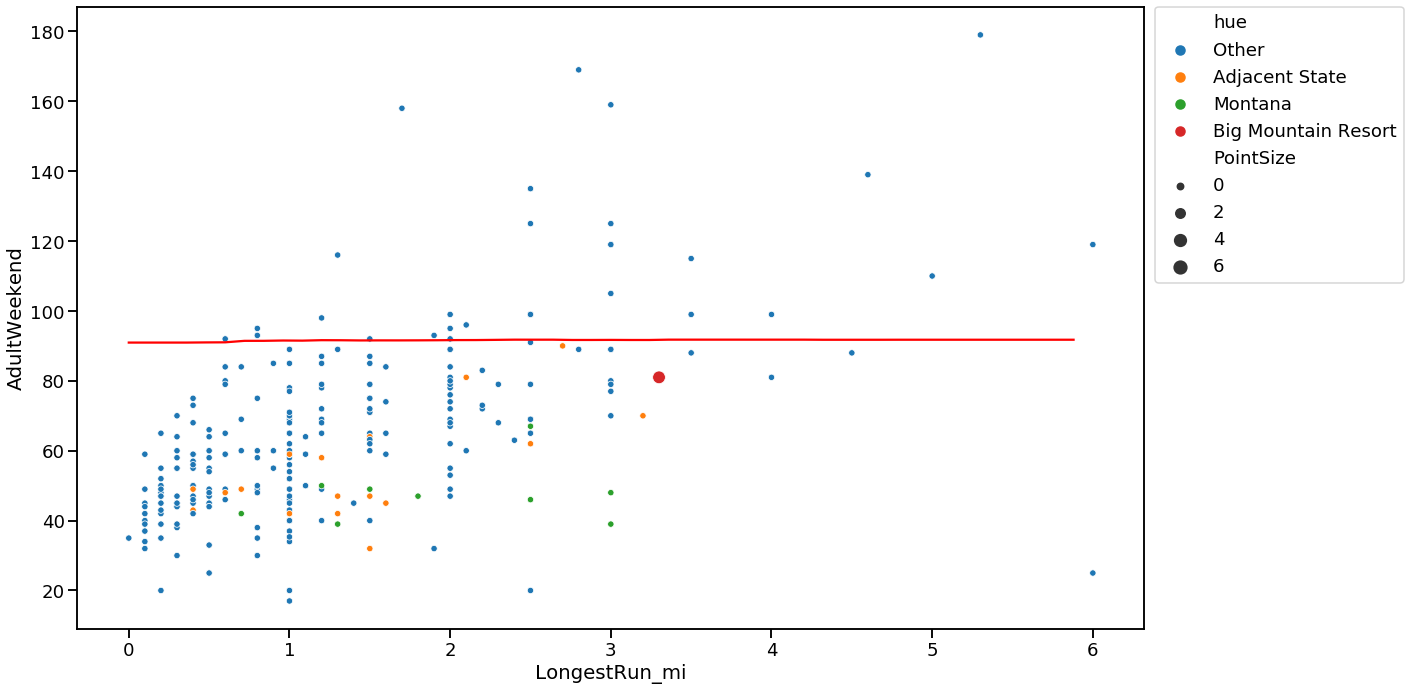

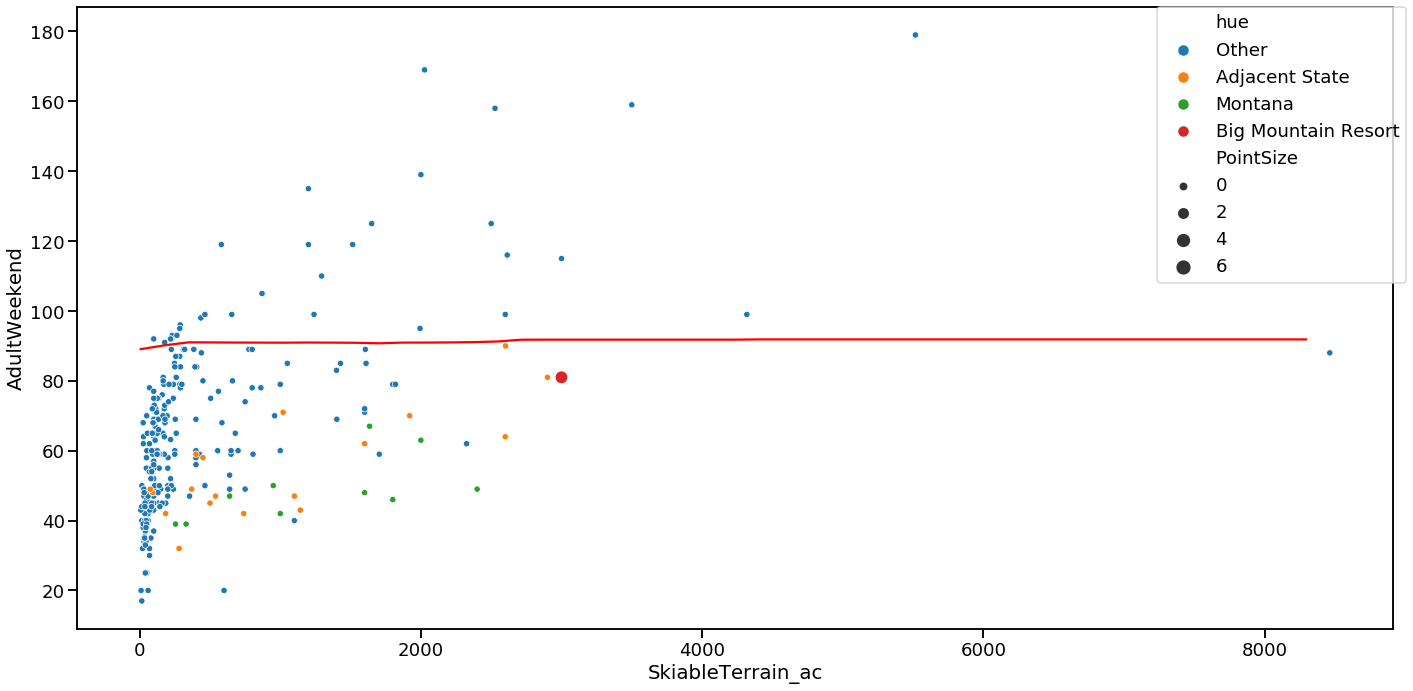

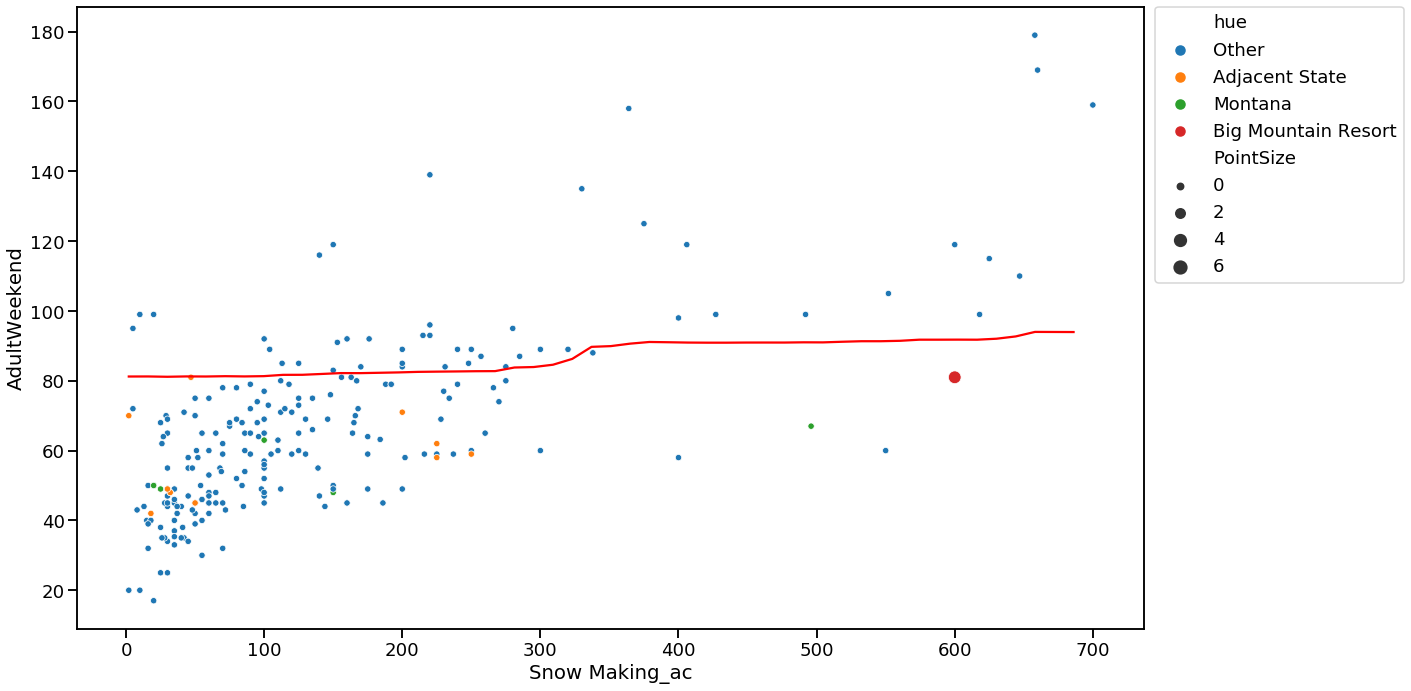

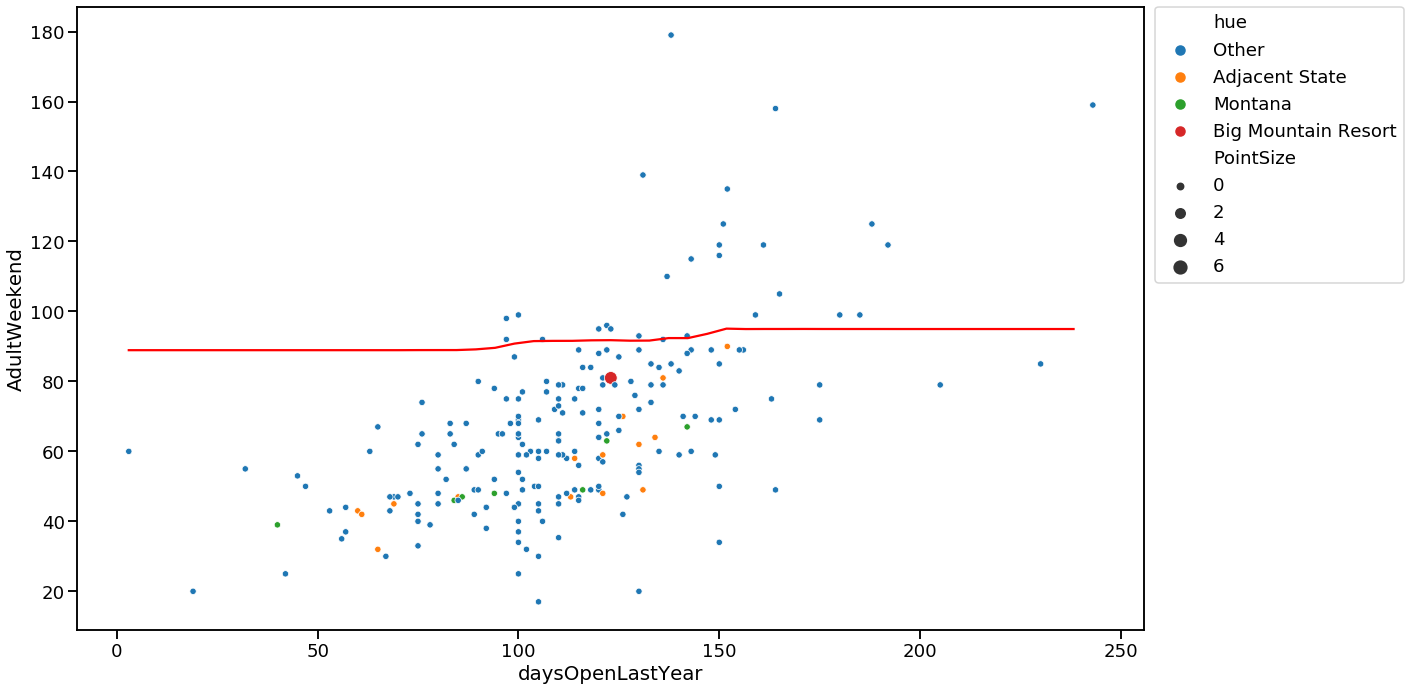

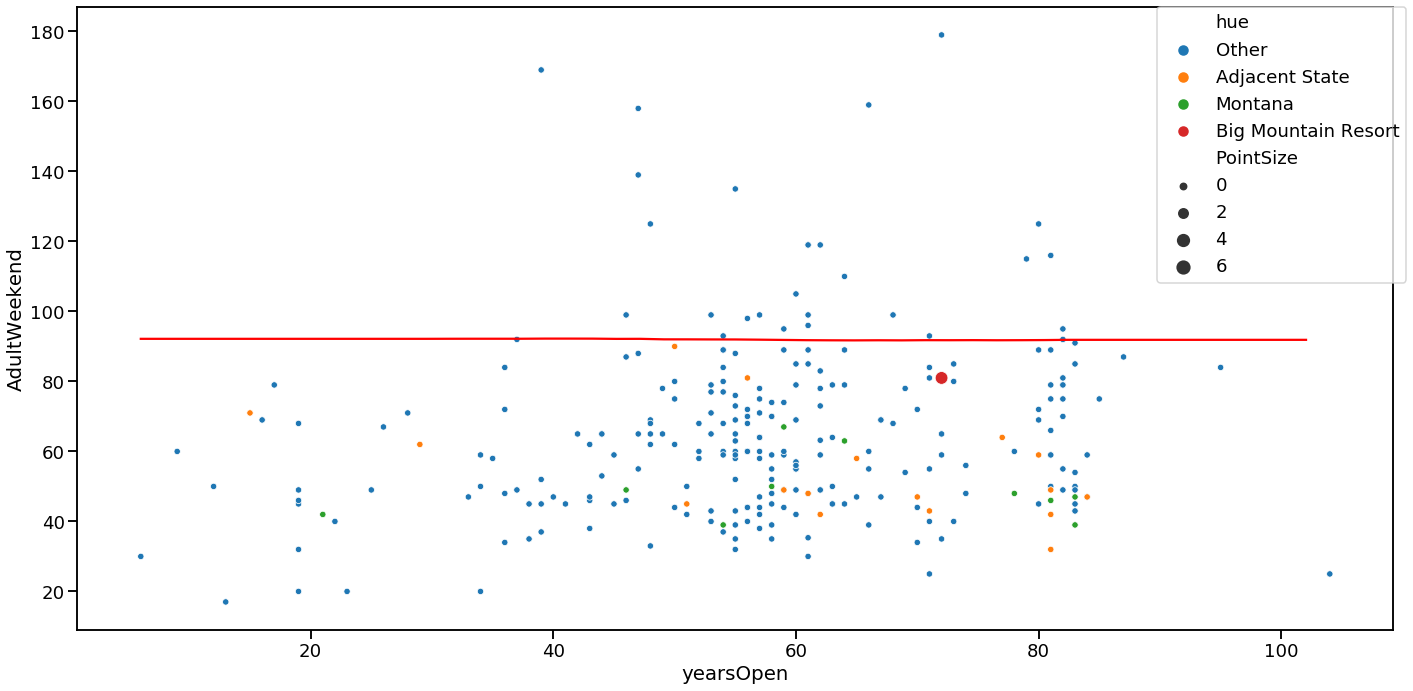

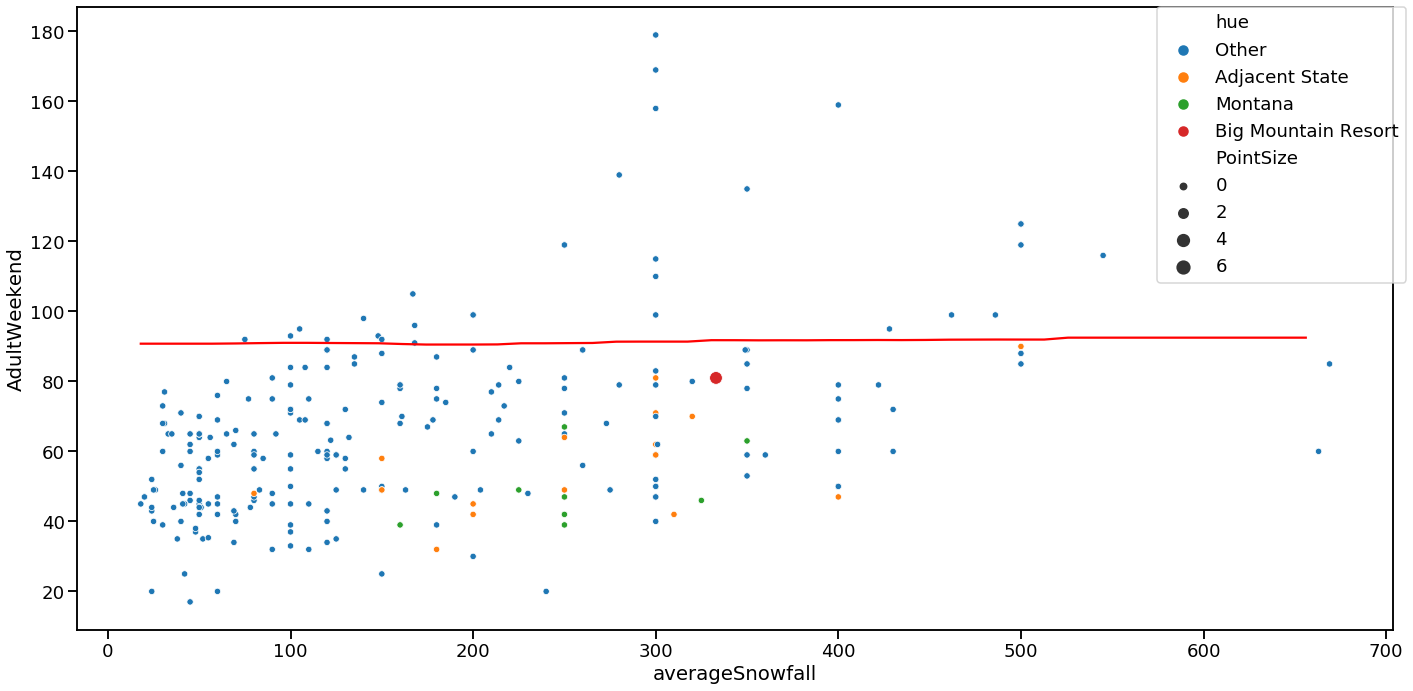

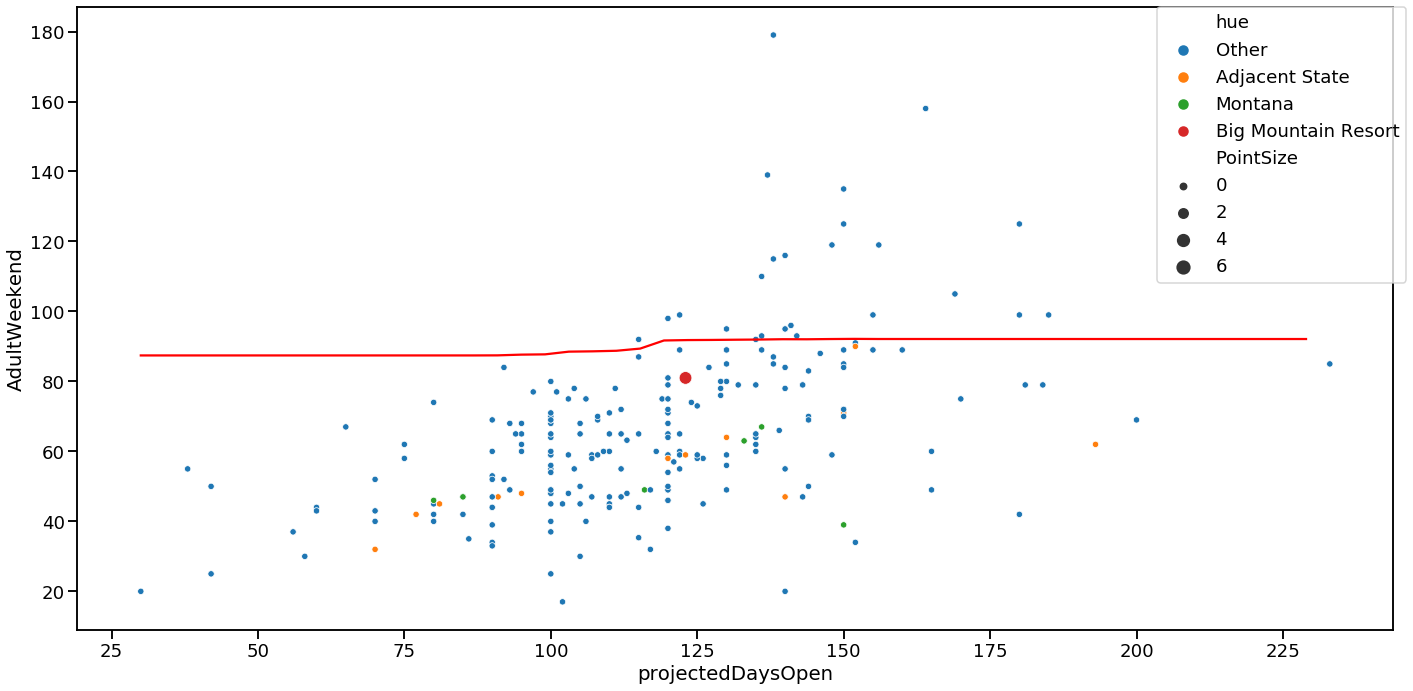

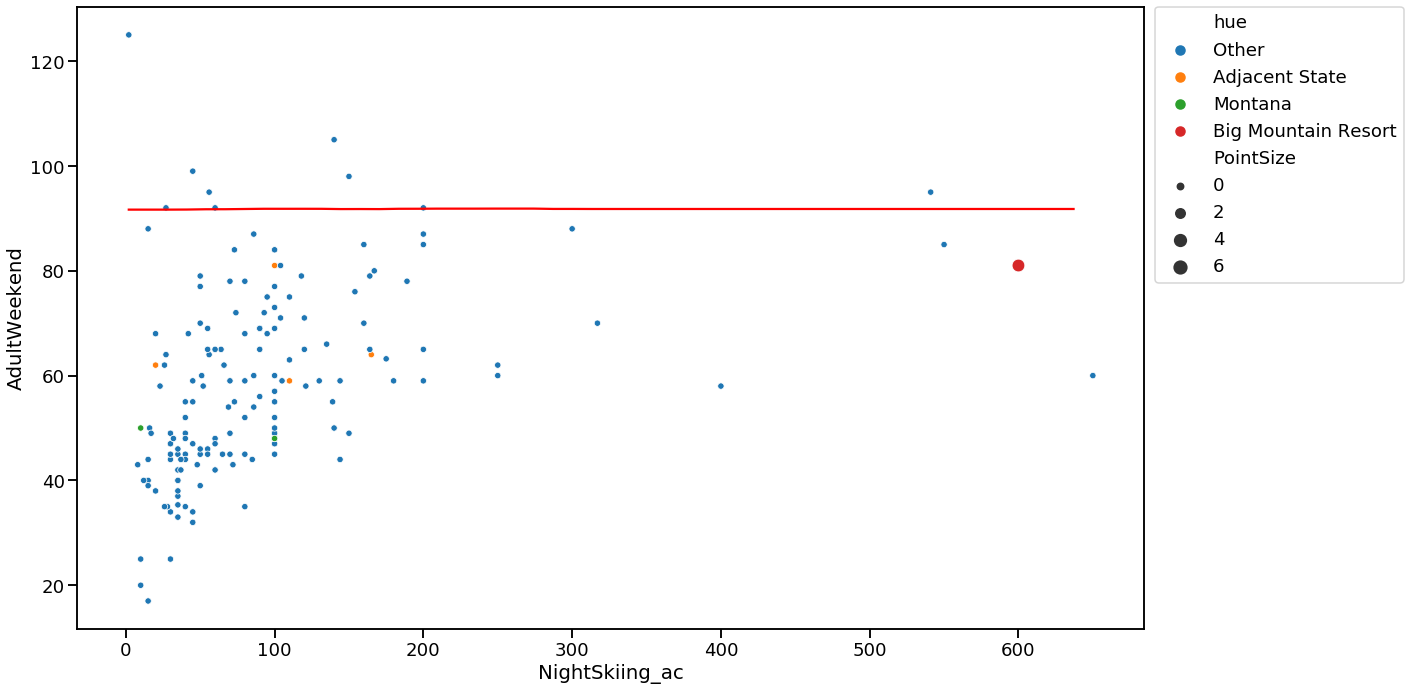

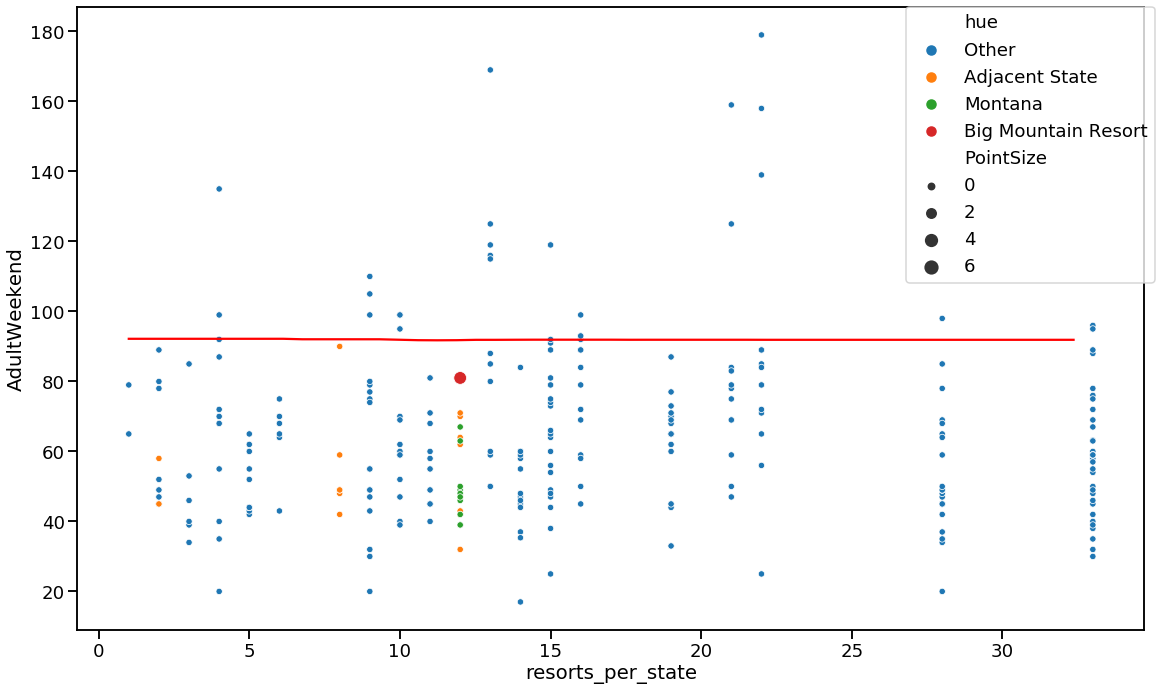

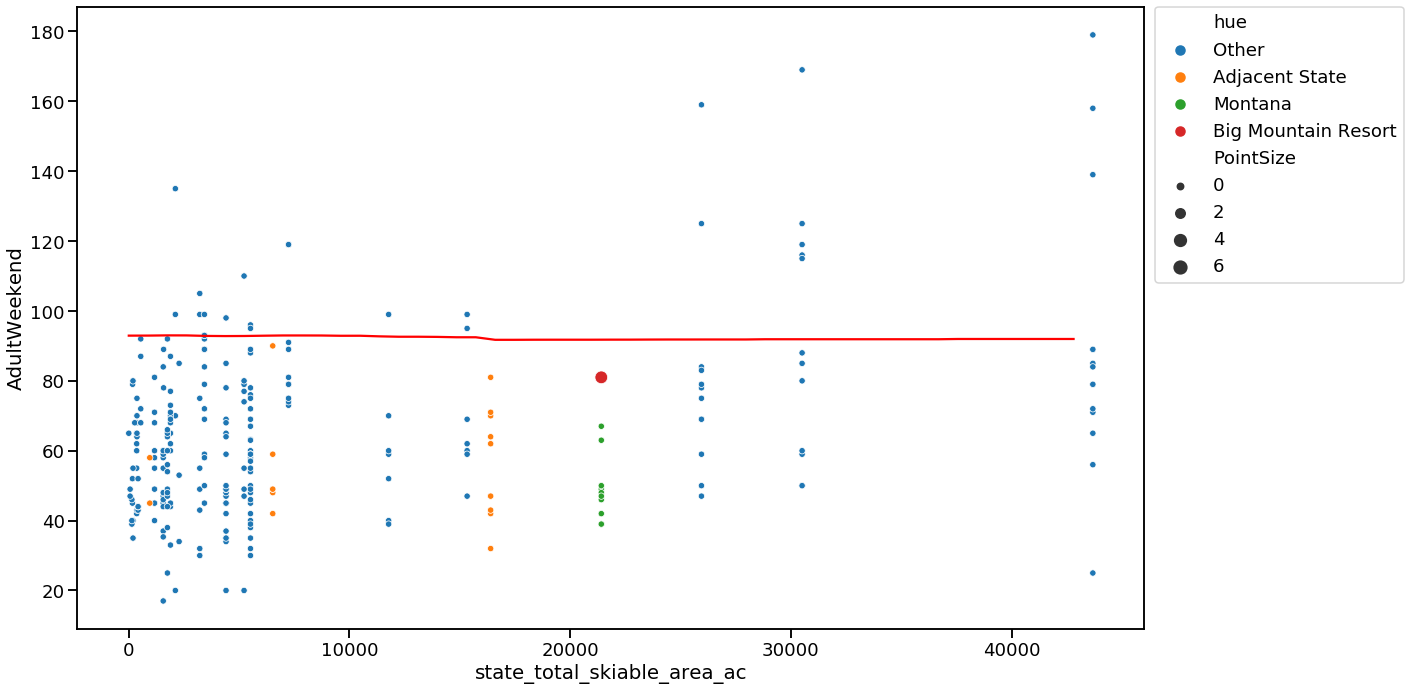

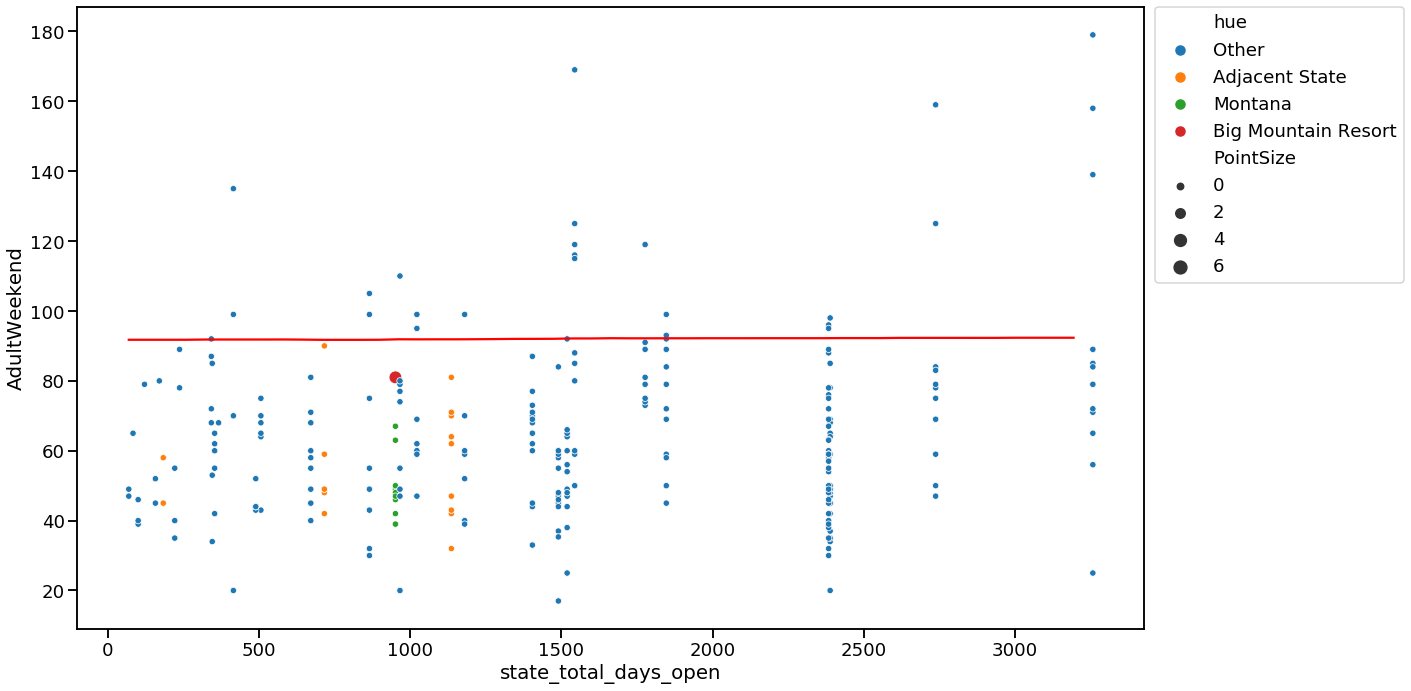

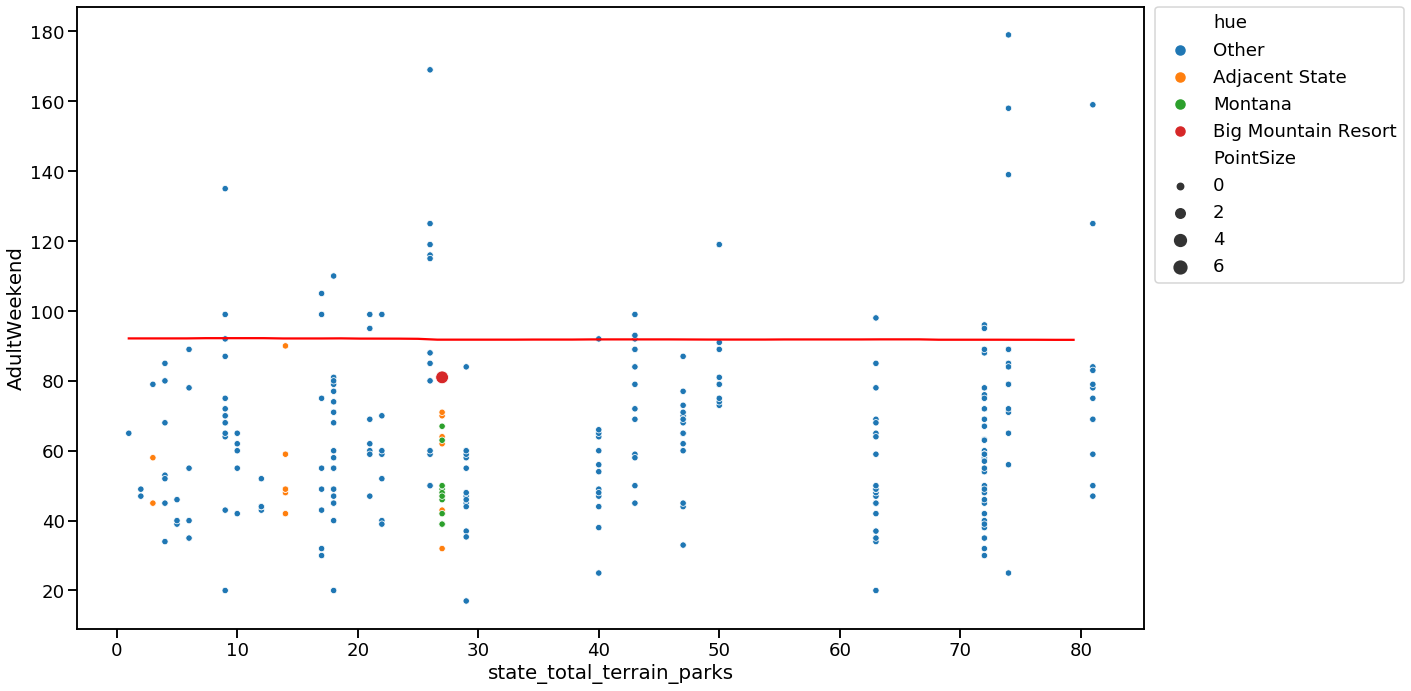

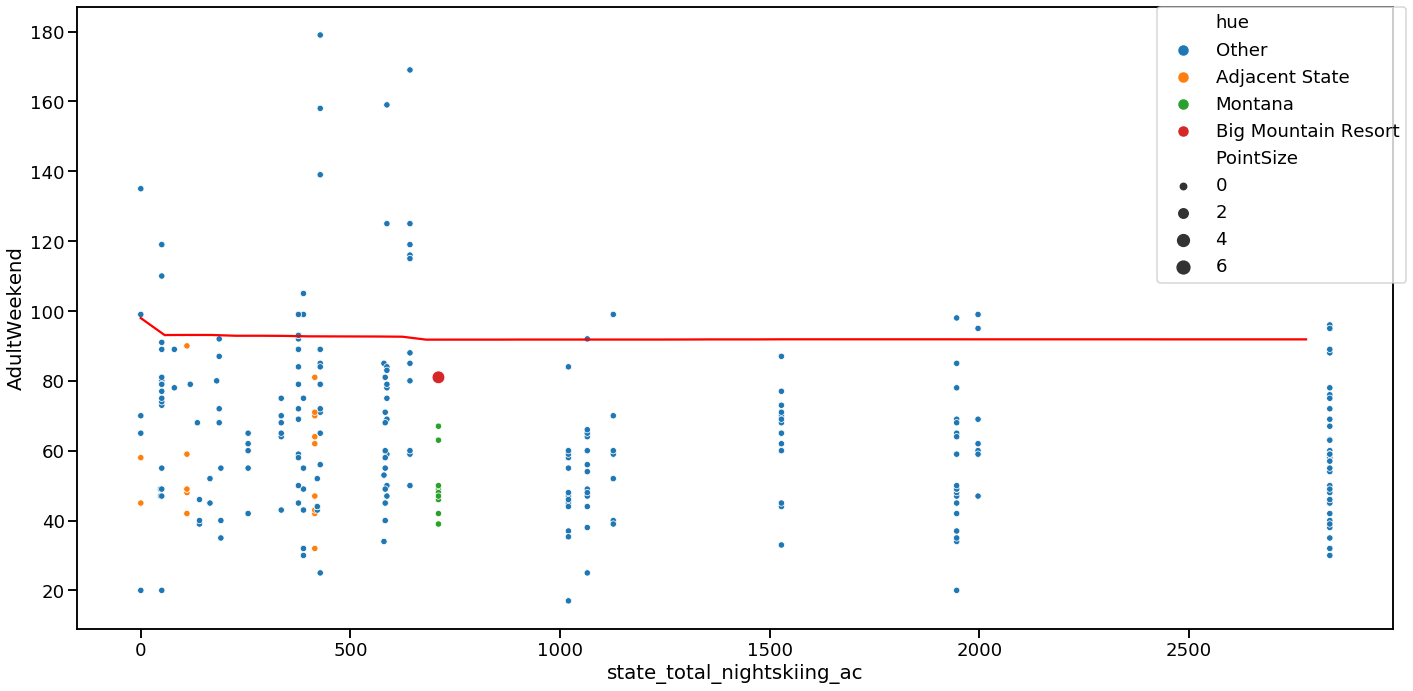

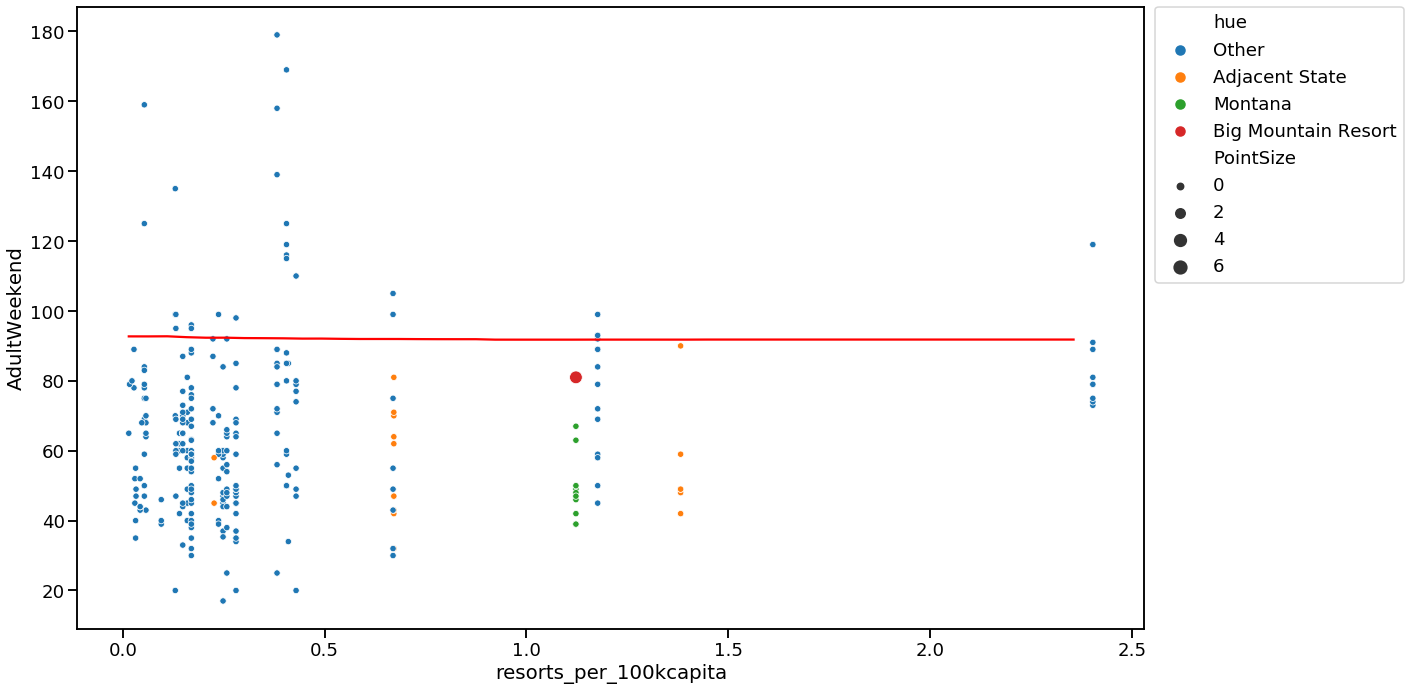

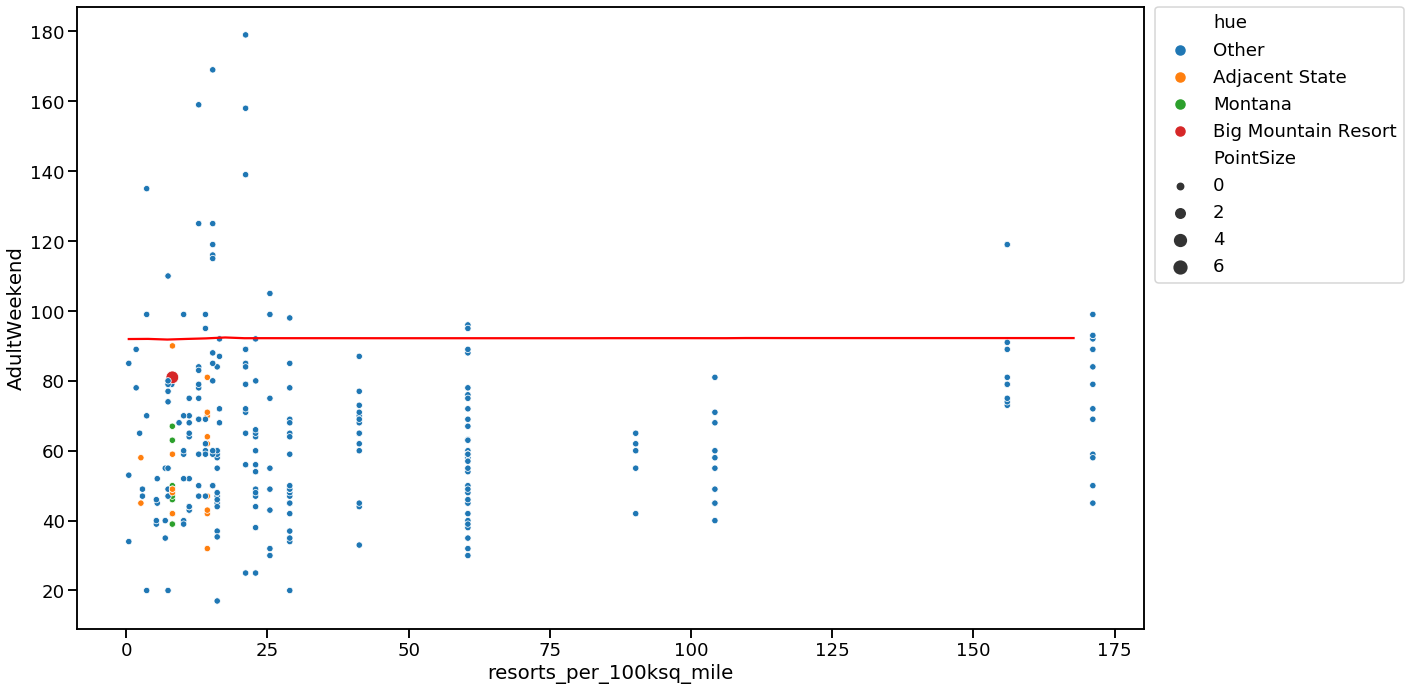

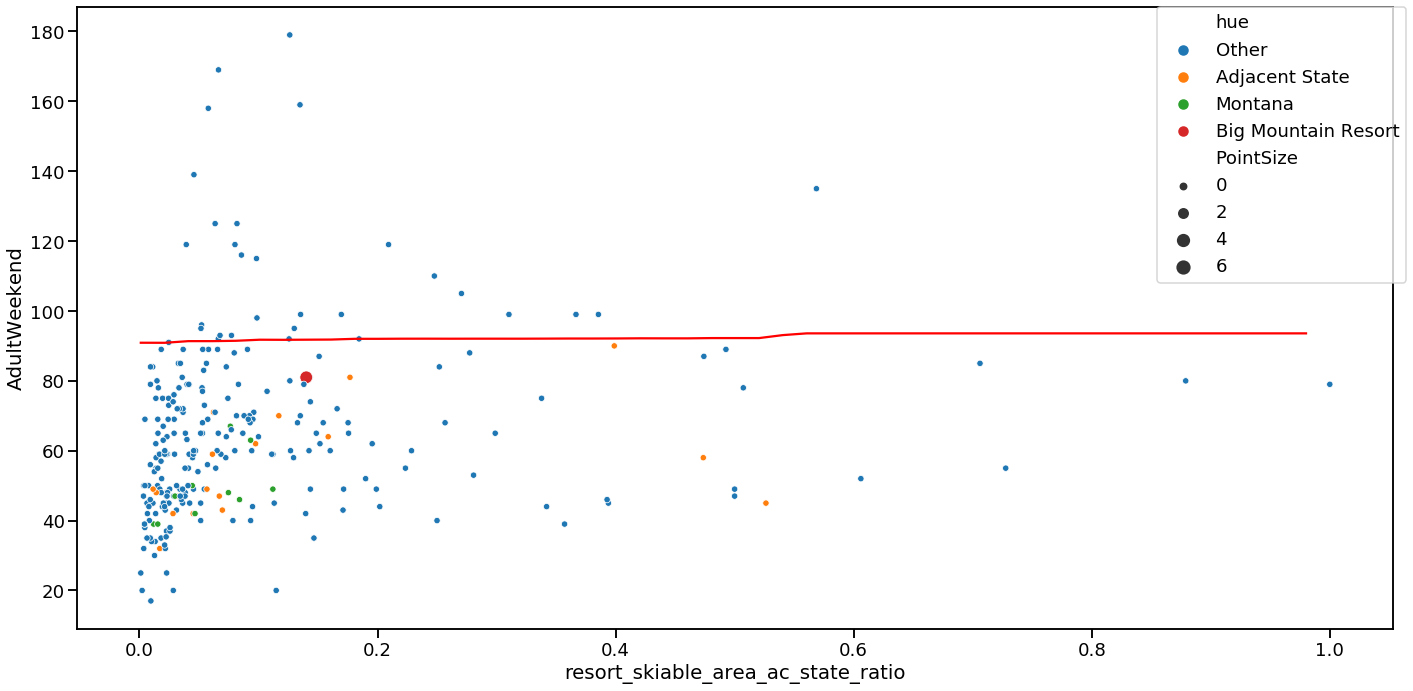

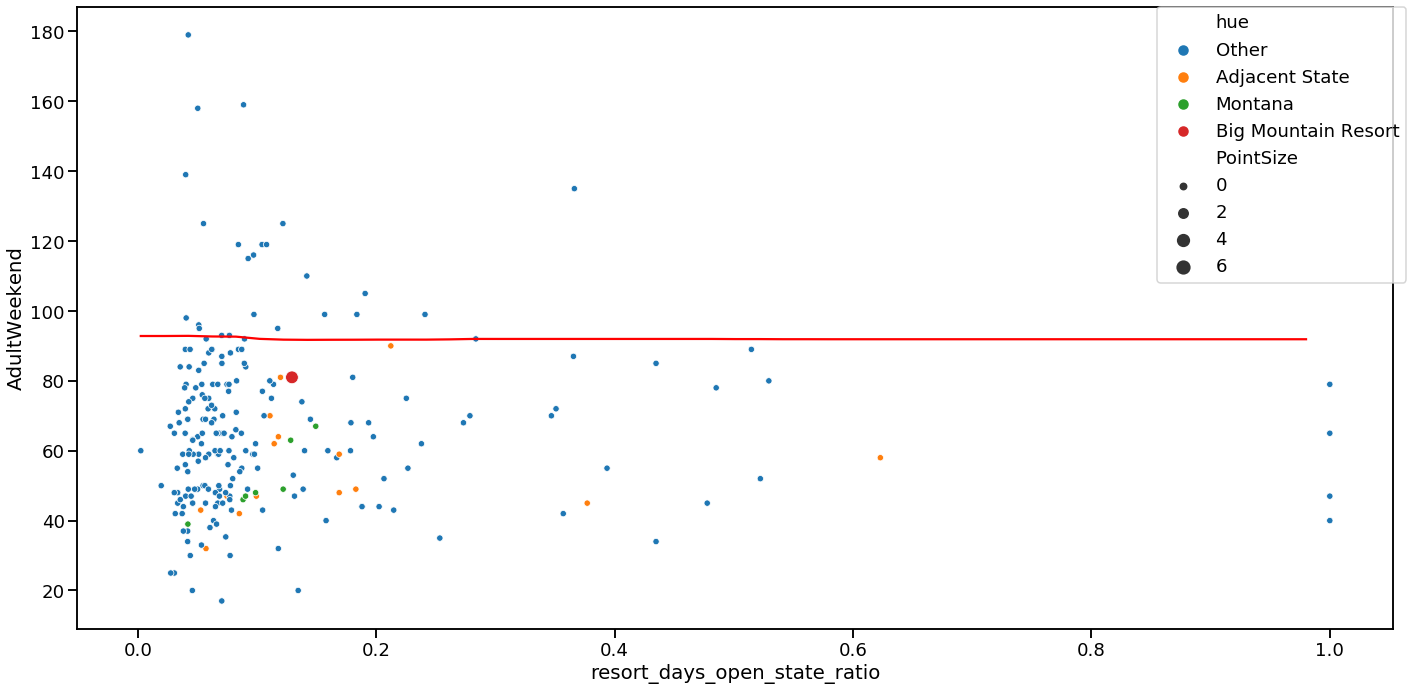

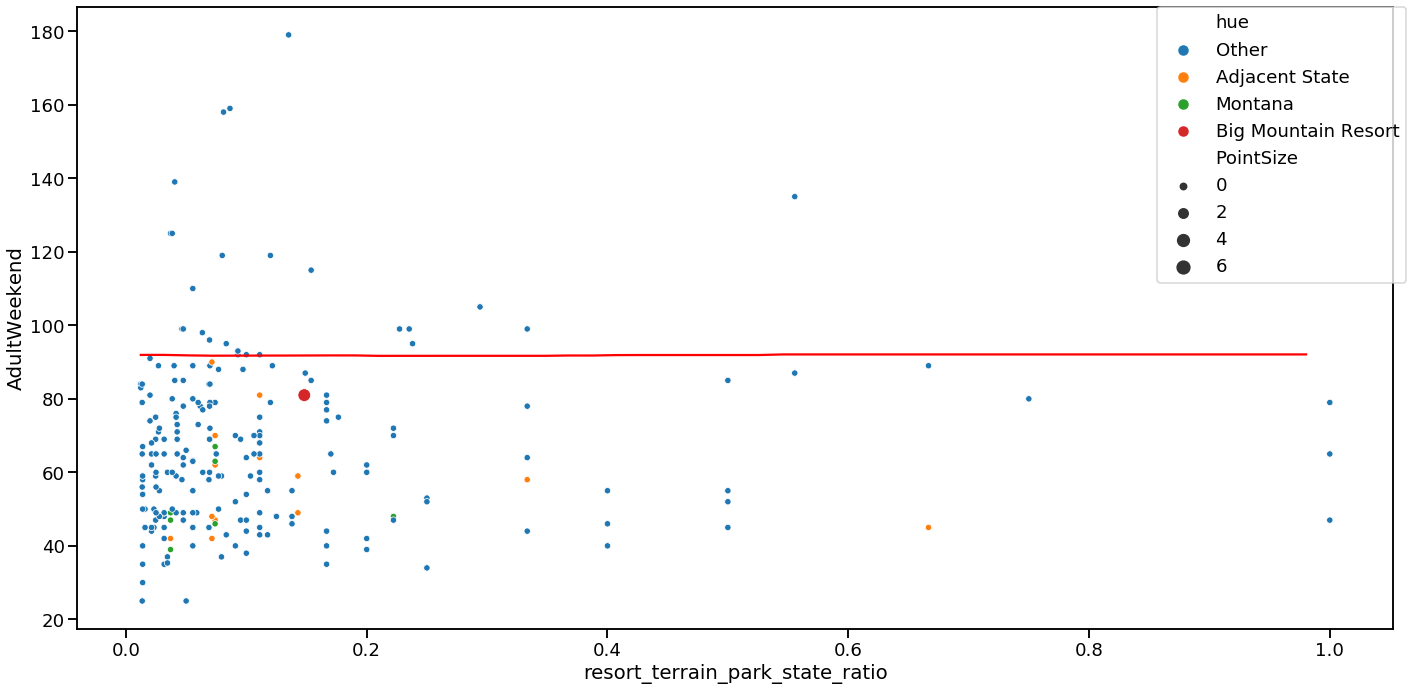

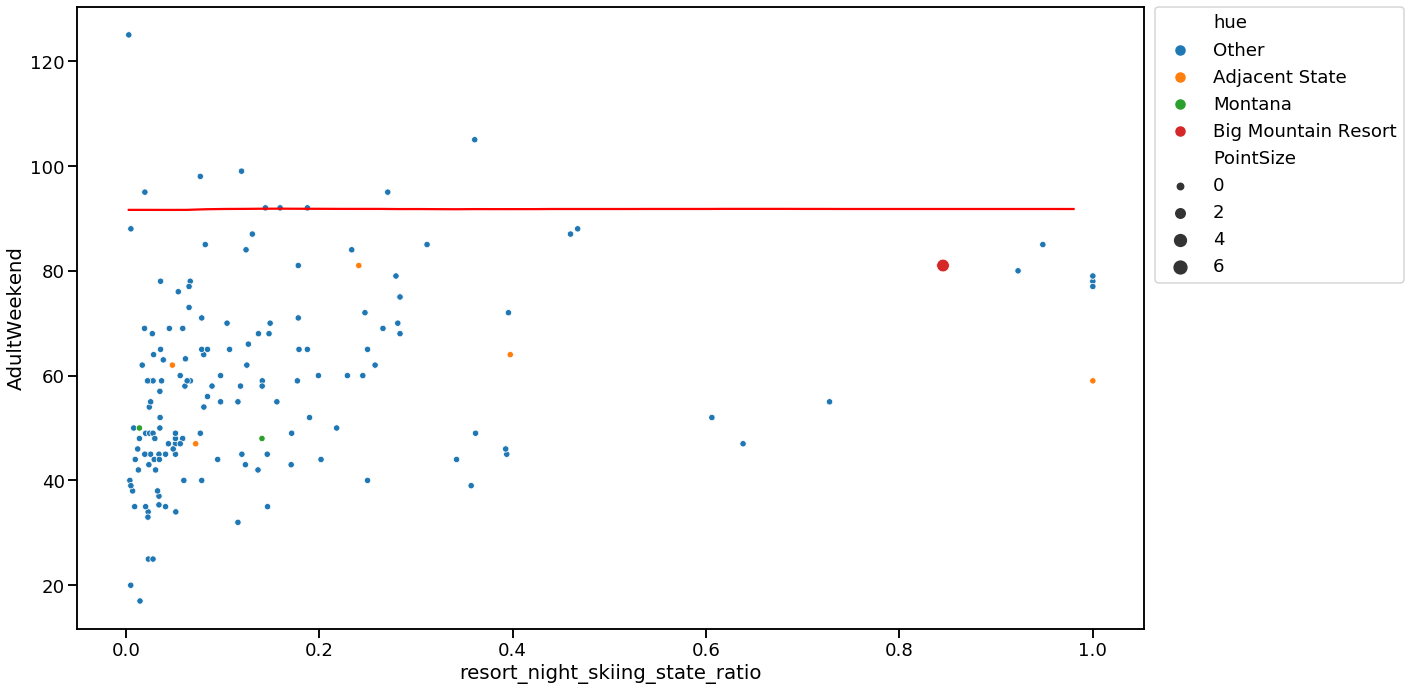

In [40]:
for col in model.X_columns:
    plotPrice(col)